<center>

### TRƯỜNG ĐẠI HỌC SƯ PHẠM KỸ THUẬT TP.HỒ CHÍ MINH
### KHOA CÔNG NGHỆ THÔNG TIN

<img src="https://avatars.githubusercontent.com/u/75773455?s=280&v=4" alt="Logo" width="300" height="300">

## BÁO CÁO CUỐI KÌ
### MÔN HỌC : PYTHON
### ĐỀ TÀI: MÔ HÌNH DỰ ĐOÁN HỖ TRỢ NGƯỜI MUA & NGƯỜI BÁN GIÁ TRỊ THỊ TRƯỜNG XE Ô TÔ
### GV: TS. NGUYỄN TRỌNG BÌNH

</center>

### Sinh viên thực hiện – Nhóm :
Đỗ Quốc Việt - 22110456

Phạm Quốc Đức - 21220310

Trịnh Ngọc Hiếu - 22110324

Võ Thị Thu Hằng - 22133016

<center>

### **01**
### **Tóm tắt**

</center>

- ***Mô hình dự đoán giá ô tô***  là một bài toán thuộc lĩnh vực học máy, trong đó mục tiêu là xây dựng một mô hình có thể dự đoán giá bán của một chiếc ô tô dựa dựa trên thông số kỹ thuật của nó. Mô hình dự đoán này sẽ hỗ trợ người mua và người bán tiềm năng ước tính giá trị thị trường hợp lý của một chiếc ô tô.

- Nhóm sẽ sử dụng phương pháp ***analysis method*** để xây dựng mô hình gợi ý giá bán xe cũ. Trong đó phương pháp phân tích hồi quy (Regression analysis) để xây dựng mô hình gợi ý giá bán xe cũ. Trong phương pháp này, chúng ta sẽ dựa vào sự tương quan giữa các đặc điểm của xe cũ (như độ mới) và giá thị trường chung. Cụ thể, chúng ta sẽ tìm kiếm các xe cũ có độ mới tương ứng với mức nào đó so với giá thị trường, sau đó sử dụng thông tin này cùng với các đánh giá (rating) của những chiếc xe đó để đề xuất giá bán cho các xe cũ khác. 

    + Ngoài ra chương trình còn được sử dụng phương pháp KNN để tìm các xe có các đặc điểm tương đồng nhất với một xe cụ thể được xem xét và dự đoán giá bán dựa trên giá bán của các xe tương đồng đó. 

    + Và RandomForestRegressor có thể được sử dụng để học mối quan hệ giữa các đặc điểm của xe (như độ mới, mẫu xe, thương hiệu, vv.) và giá bán, sau đó dự đoán giá bán của các xe cũ dựa trên các đặc điểm này.

<center>

### **02**
### **Giới thiệu**

</center>

- Thị trường xe cũ ở các nước đang chứng kiến sự tăng trưởng mạnh mẽ, thu hút đông đảo người mua và bán. Tuy nhiên, việc xác định giá bán hợp lý cho xe cũ luôn là một vấn đề nan giải, khiến cả người bán và người mua đều băn khoăn. Doanh thu và trải nghiệm người dùng trên các nền tảng mua bán xe cũ cũng bị ảnh hưởng bởi vấn đề này. Bằng cách phân tích dữ liệu thị trường và thông tin về xe, hệ thống có thể đưa ra những gợi ý chính xác về giá trị thực của một chiếc xe cụ thể. Điều này giúp người bán xe cũ có cơ sở để định giá hợp lý, thu hút khách hàng tiềm năng và tối ưu hóa lợi nhuận. Đồng thời, người mua xe cũ cũng có thể dễ dàng tìm kiếm những chiếc xe phù hợp với nhu cầu và khả năng tài chính của họ.

- Hệ thống gợi ý giá bán xe cũ cung cấp cho người bán thông tin về giá trị thị trường của xe dựa trên các yếu tố như thương hiệu, đời xe, tình trạng xe, số km đã chạy,... giúp họ đưa ra mức giá phù hợp, thu hút người mua tiềm năng và tối đa hóa lợi nhuận.

- **Input** của bài toán là thông số kỹ thuật xe của người bán

- Nhóm sử dụng các thuật toán **k-Nearest Neighbors (kNN)**, **Hồi quy tuyến tính** và **Random forest regression** để xây dựng hệ thống gợi ý giá bán xe cũ 

- **Output** của bài toán là giá bán phù hợp với các thông số kỹ thuật của từng loại xe

<center>

### **03**
### **Dữ liệu**

</center>

#### **Tổng quan về dataset**

\- Tập dữ liệu sử dụng trong bài toán này là [Second Hand Cars Price Prediction](https://www.kaggle.com/code/mkumar7895/second-hand-cars-price-prediction-90), được cung cấp bởi Kaggle. 


\- Tập dữ liệu này có 1 file csv về thông tin những chiếc xe cũ của các thương hiệu  

#### **File Cars.csv**

- Car_ID: Mã số của xe ô tô

- Brand: Tên thương hiệu của xe ô tô

- Model: Tác xe ô tô

- Year: Năm sản xuất xe

- Kilometers_Driven: Quãng đường đã đi

- Fuel_Type: Loại nhiên liệu

- Transmission: Hộp số (VD: số sàn, số tự động, số CVT)

- Owner_Type: Loại chủ sở hữu

- Mileage: Mức tiêu hao nhiên liệu

- Engine: Dung tích động cơ

- Power: Công suất

- Seats: Số lượng ghế 

- Price: Giá bán

#### **XUẤT RA BẢNG DỮ LIỆU**

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor


df = pd.read_csv('cars.csv')
df.head()




,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


#### **TIỀN XỬ LÝ DỮ LIỆU**

In [71]:
#Xóa dữ liệu cột ID
df=df.drop(columns=['Car_ID'],axis=1)


In [72]:
#### ***Tóm tắt chi tiết về cấu trúc và thông tin của DataFrame***
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              100 non-null    object
 1   Model              100 non-null    object
 2   Year               100 non-null    int64 
 3   Kilometers_Driven  100 non-null    int64 
 4   Fuel_Type          100 non-null    object
 5   Transmission       100 non-null    object
 6   Owner_Type         100 non-null    object
 7   Mileage            100 non-null    int64 
 8   Engine             100 non-null    int64 
 9   Power              100 non-null    int64 
 10  Seats              100 non-null    int64 
 11  Price              100 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 9.5+ KB


In [73]:
#Định dạng cột và hàng
df.shape


(100, 12)

In [74]:
# describe để tóm tắt dữ liệu trong DataFrame
# dễ dàng hiểu được phân bố, xu hướng và đặc điểm cơ bản của dữ liệu, từ đó hỗ trợ bạn trong việc phân tích dữ liệu và đưa ra quyết định.
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


In [75]:
#xác định và đếm số lượng giá trị null trong mỗi cột của DataFrame. 
#Nó giúp bạn dễ dàng đánh giá mức độ hoàn chỉnh của dữ liệu và hỗ trợ bạn trong việc xử lý dữ liệu thiếu hiệu quả
df.isnull().sum()

Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [76]:
# chuyển đổi dữ liệu phân loại thành dạng số, giúp chuẩn bị dữ liệu cho các mô hình học máy và tăng độ chính xác của mô hình
Lbl = LabelEncoder()

In [77]:
#Đoạn code này lặp qua tất cả các cột trong DataFrame của bạn và kiểm tra xem kiểu dữ liệu của chúng có phải là "object" (thường được sử dụng cho dữ liệu phân loại) hay không. 
#Nếu kiểu dữ liệu là "object", tên cột sẽ được thêm vào một danh sách mới có tên categorical_columns. 
#Danh sách này sẽ chứa tên của tất cả các cột phân loại trong DataFrame df của bạn.
categorical_columns=[column for column in df.columns if df[column].dtype=="O"]

In [78]:
#là một bước xử lý dữ liệu quan trọng khi làm việc với các mô hình học máy. 
#Chuyển đổi dữ liệu phân loại thành dạng số giúp các mô hình có thể hiểu và xử lý dữ liệu hiệu quả hơn.
df[categorical_columns] = df[categorical_columns].apply(lambda x: Lbl.fit_transform(x))

### **TRỰC QUAN HÓA DỮ LIỆU**

##### ***- Biểu đồ cặp biến số với màu sắc cho loại nhiên liệu***

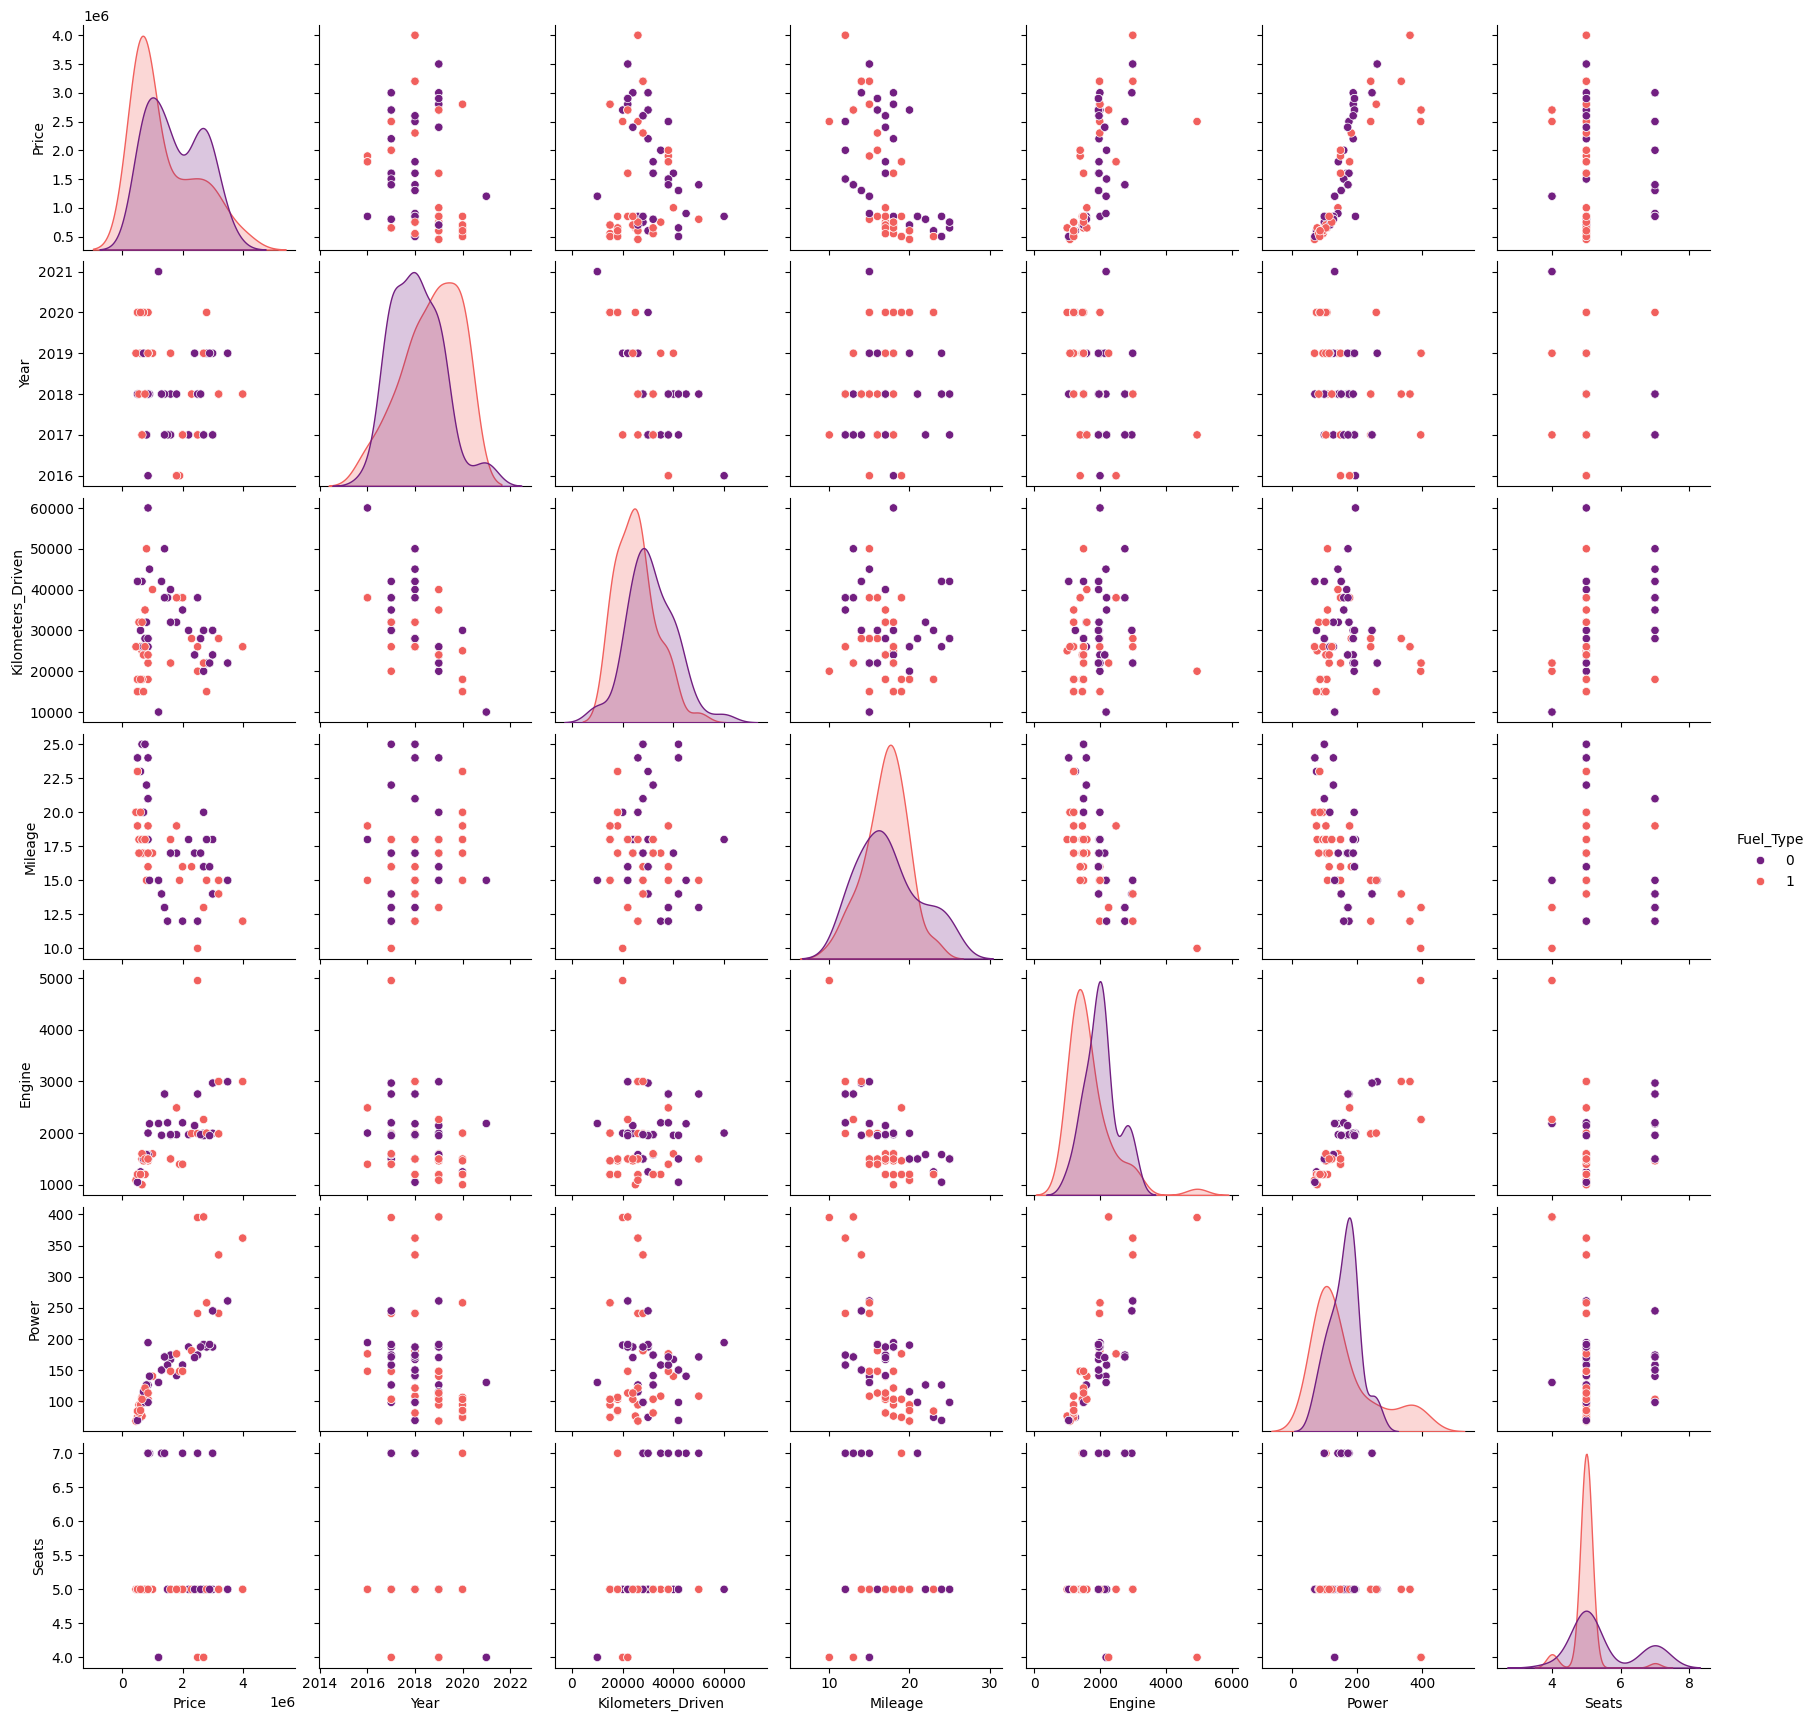

In [79]:
columns_to_include = ['Price', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Fuel_Type']
# - pairplot : biểu đồ cặp trong seaborn (sns)
# - Pairplot là một dạng biểu đồ ma trận, hiển thị tất cả các cặp thuộc tính được chọn trong list columns_to_include 
#dưới dạng các biểu đồ tán sắc (scatter plot) ở phần trên chéo và biểu đồ phân bố (histogram) ở phần dưới chéo.
sns.pairplot(df[columns_to_include], hue='Fuel_Type', palette='magma') #magma là bảng màu magma
#Hue : màu sắc

plt.show()

##### Nhận xét:
- Khám phá mối quan hệ giữa các biến số được chọn trong DataFrame (df), đồng thời phân biệt các điểm dữ liệu theo loại nhiên liệu (Fuel_Type). Biểu đồ này cung cấp cái nhìn tổng quan về sự phân bố của dữ liệu và mối tương quan giữa các biến. 

- Biểu đồ Pairplot trong đoạn code được sử dụng để trực quan hóa mối quan hệ giữa các biến trong tập dữ liệu xe hơi. Biểu đồ bao gồm một ma trận các biểu đồ con, trong đó mỗi biểu đồ con thể hiện mối quan hệ giữa hai biến cụ thể.

- Loại biểu đồ:
  - Phần trên chéo: Biểu đồ tán xạ (scatter plot) thể hiện mối quan hệ giữa từng cặp biến về mặt giá trị.
  - Phần dưới chéo: Biểu đồ mật độ (density plot) thể hiện phân bố của mỗi biến riêng lẻ.
- Phân tích mối quan hệ:

   - Nhìn chung, có thể thấy một xu hướng giảm dần từ trái sang phải (từ trên xuống dưới) trong biểu đồ. Điều này cho thấy:
        -	Xe có quãng đường đã đi cao (bên trái) có xu hướng giá bán thấp hơn (bên dưới).
        -	Xe có quãng đường đã đi thấp (bên phải) có xu hướng giá bán cao hơn (bên trên).

- Tuy nhiên, mối quan hệ này không hoàn toàn là tuyến tính. Có thể thấy một số điểm dữ liệu (màu xanh lam) nằm bên trên đường xu hướng chung. Điều này có thể là do các yếu tố khác ngoài quãng đường đã đi ảnh hưởng đến giá bán, như:
    •	Thương hiệu xe
    •	Năm sản xuất
    •	Tình trạng xe
    •	Trang bị

#### Kết luận:
   - Biểu đồ Pairplot cung cấp thông tin chi tiết về mối quan hệ giữa các biến trong tập dữ liệu xe hơi, giúp người dùng:
      - Hiểu rõ hơn về cách các biến ảnh hưởng lẫn nhau.
      - Xác định các yếu tố ảnh hưởng đến giá bán xe.
      - Phân loại xe dựa trên các đặc điểm và giá bán.
      - Lựa chọn xe phù hợp với nhu cầu và ngân sách.


##### ***- Biểu đồ biểu diễn tần suất của dữ liệu***

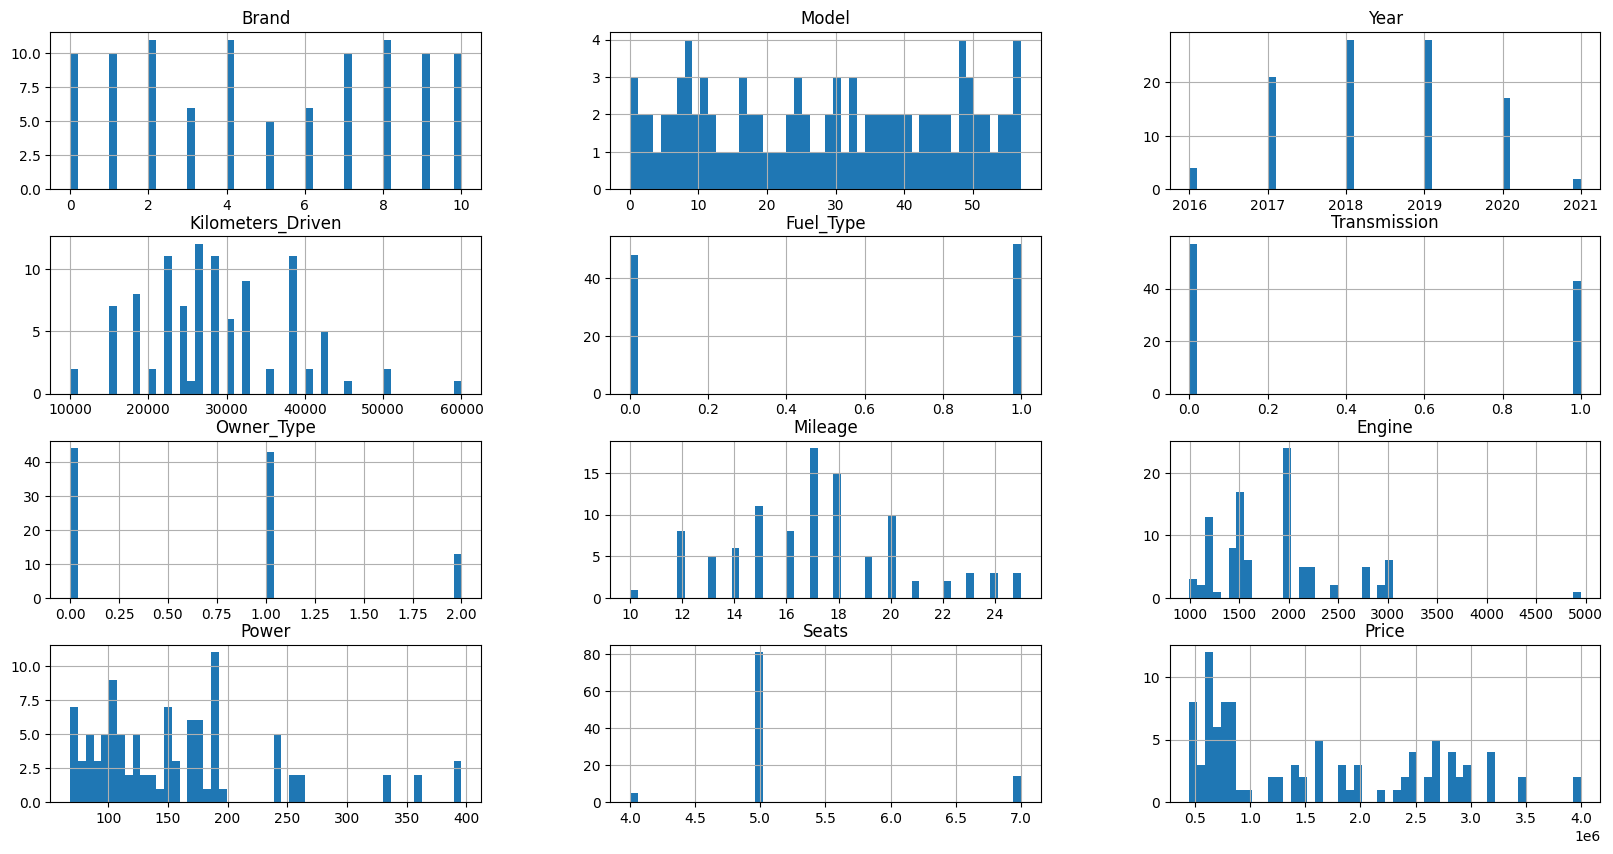

In [80]:
df.hist(figsize=(20,10),bins = 50)
plt.show()

#### Nhận xét:
- Ưu điểm của biểu đồ Histogram:
  - Hiểu biết nhanh về phân bố dữ liệu: Dễ dàng quan sát xem dữ liệu tập trung ở khu vực nào, có bị lệch hay đối xứng hay không.
  - Xác định giá trị ngoại lệ: Các điểm dữ liệu nằm xa so với phần lớn dữ liệu có thể là giá trị ngoại lệ.
  - So sánh phân bố của nhiều tập dữ liệu: Có thể so sánh các biểu đồ Histogram của các tập dữ liệu khác nhau để xem chúng có phân bố tương tự hay khác nhau.

- Kết luận:

  - Biểu đồ Histogram là một công cụ trực quan mạnh mẽ giúp mô tả sự phân bố tần suất của dữ liệu liên tục, cung cấp thông tin hữu ích cho việc phân tích và đưa ra quyết định.

##### ***- Biểu đồ thể hiện sự phân bố giá xe theo loại nhiên liệu***

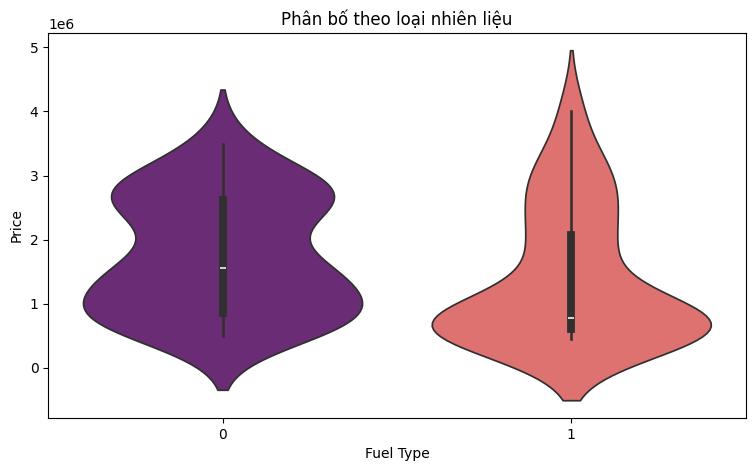

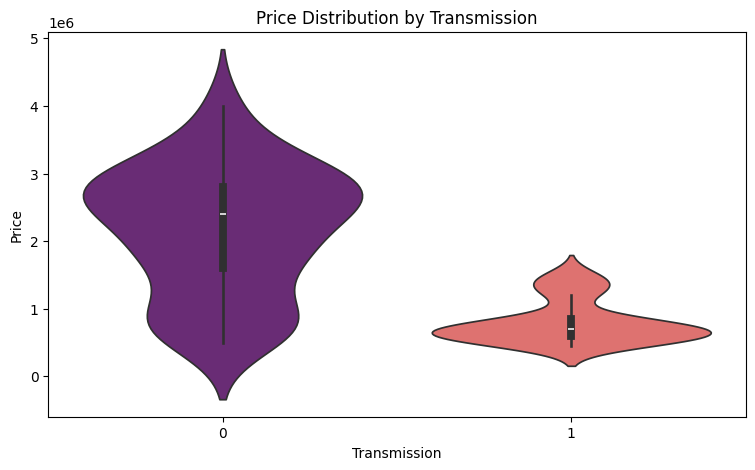

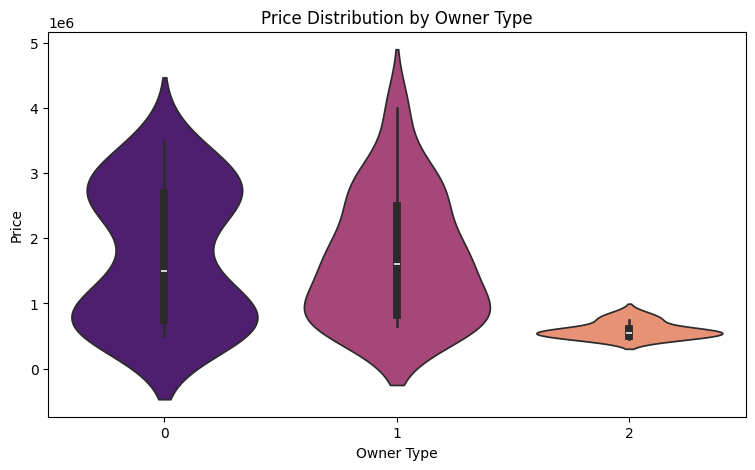

In [81]:
#  Violin plot of Price vs. Fuel_Type
plt.figure(figsize=(9, 5))
sns.violinplot(x='Fuel_Type', y='Price', data=df,palette="magma")
plt.title('Phân bố theo loại nhiên liệu')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()  

# Violin plot for Transmission
plt.figure(figsize=(9, 5))
sns.violinplot(x='Transmission', y='Price', data=df,palette="magma")
plt.title('Price Distribution by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()

# Violin plot for Owner_Type
plt.figure(figsize=(9, 5))
sns.violinplot(x='Owner_Type', y='Price', data=df,palette="magma")
plt.title('Price Distribution by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Price')
plt.show()

#### - Biểu đồ thể hiện số lượng xe của các thương hiệu

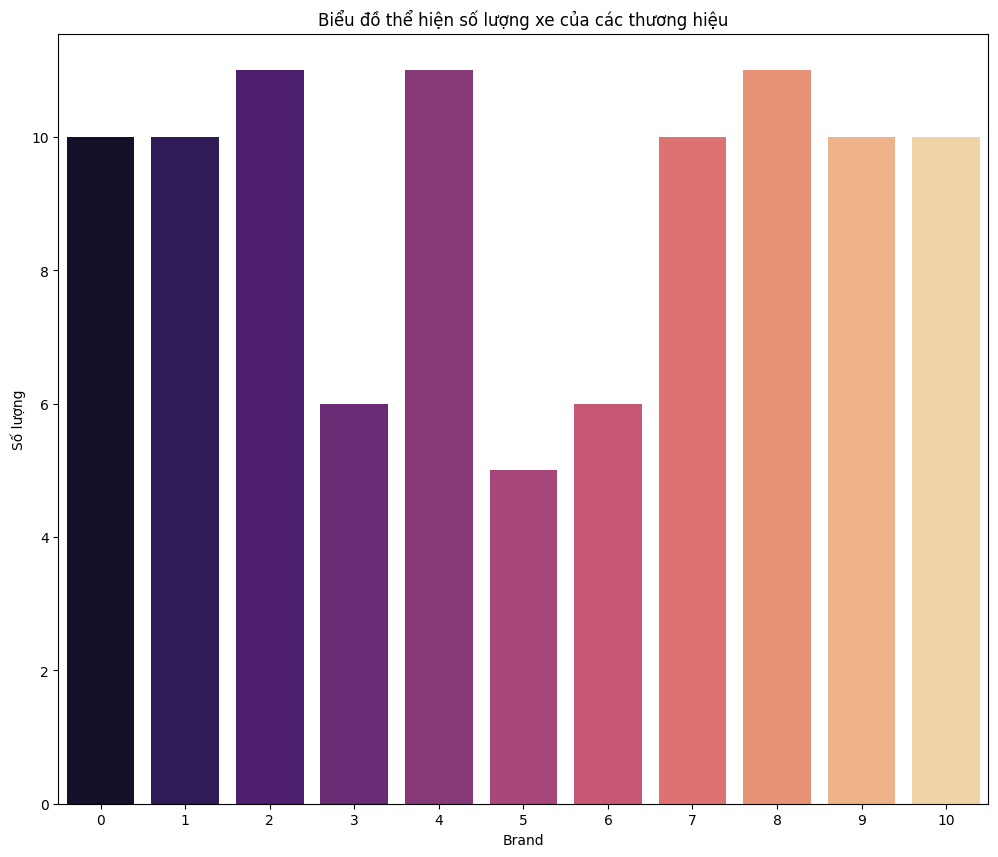

In [82]:
# Brand counterplot
plt.figure(figsize=(12, 10))
sns.countplot(x='Brand', data=df,palette="magma")
plt.xlabel('Brand')
plt.ylabel('Số lượng')
plt.title('Biểu đồ thể hiện số lượng xe của các thương hiệu')
plt.show()

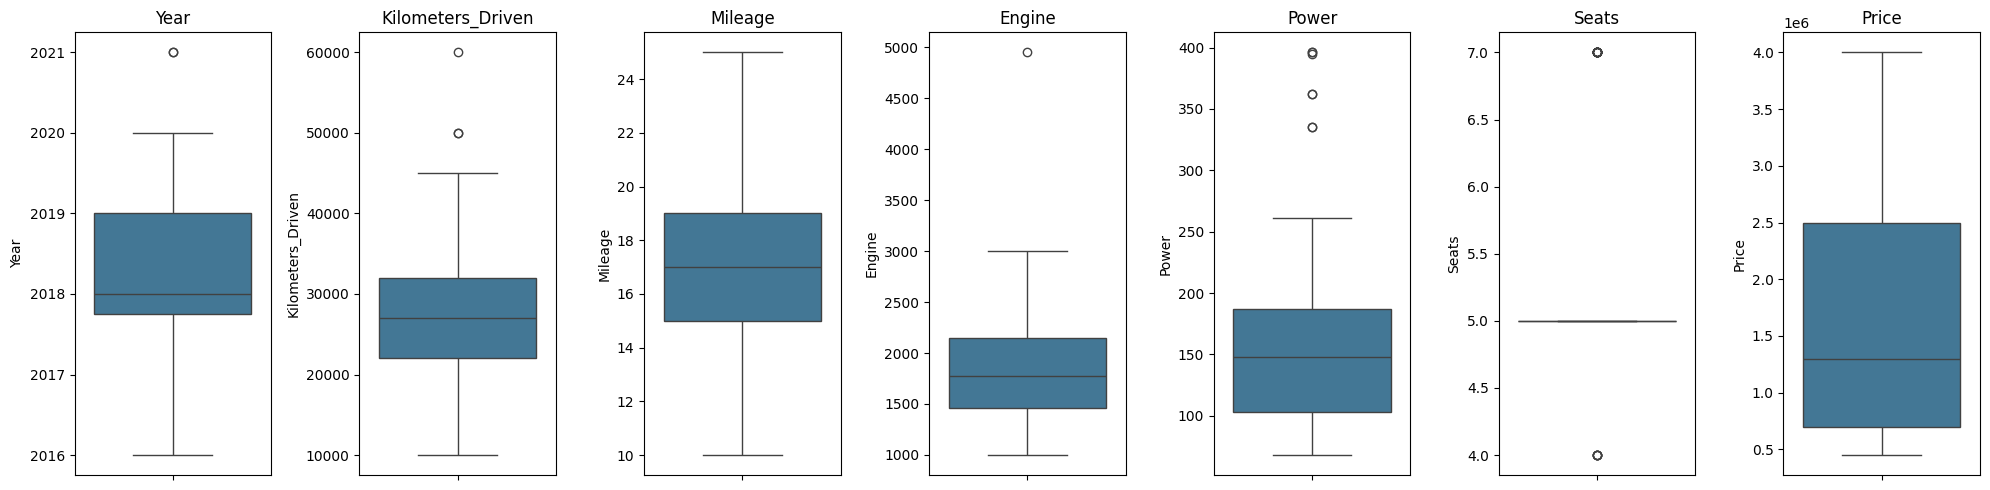

In [83]:
boxplot_columns = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
fig, axes = plt.subplots(1, 7, figsize=(20, 5))
for i, column in enumerate(boxplot_columns):
    sns.boxplot(y=df[column], ax=axes[i], palette='mako')
    axes[i].set_title(column)
plt.tight_layout()
plt.show()


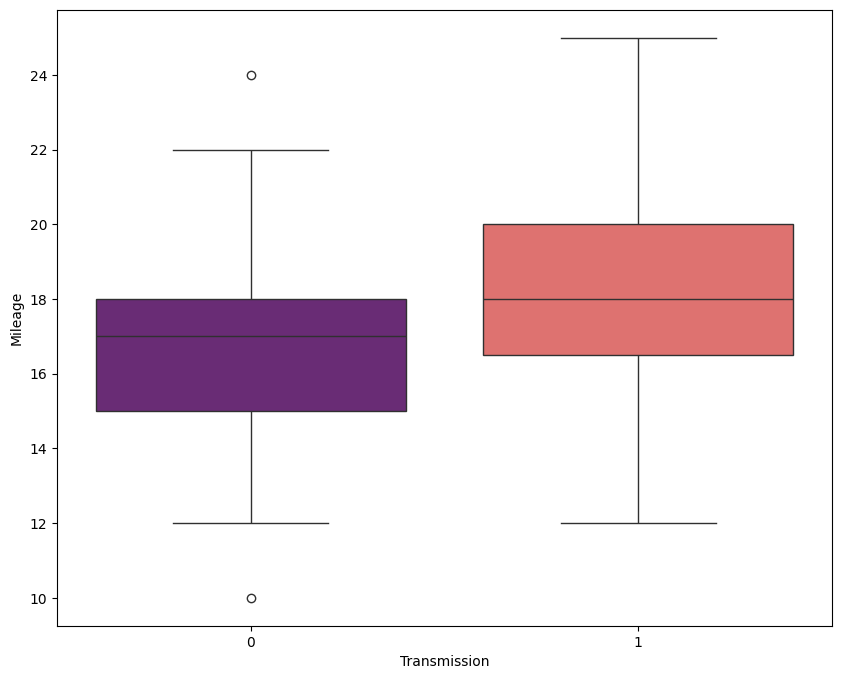

In [84]:
# Mileage vs Transmission
plt.figure(figsize=(10,8))
sns.boxplot(x='Transmission',y='Mileage',data=df, palette='magma')
plt.xlabel('Transmission')
plt.ylabel('Mileage')
plt.show()

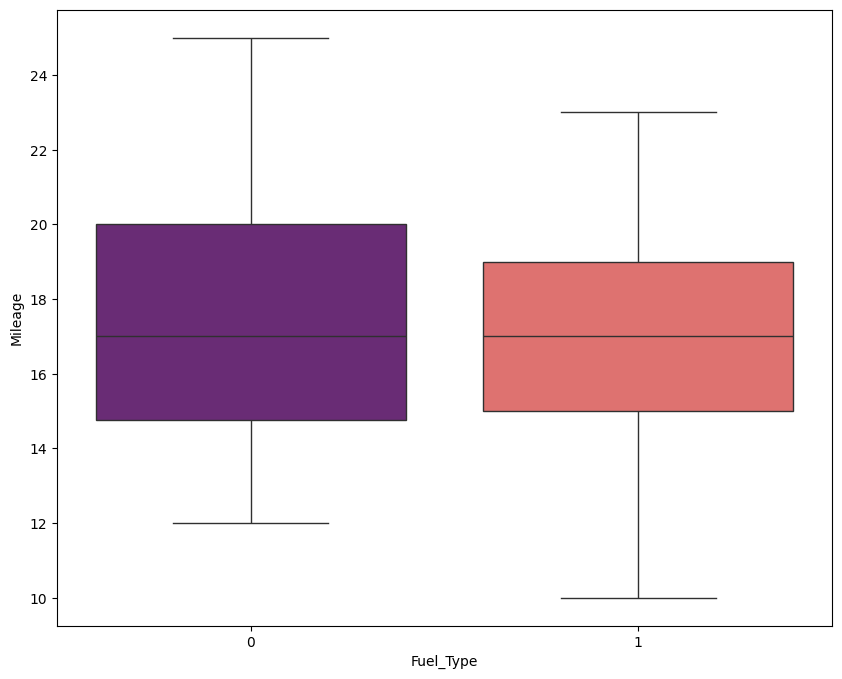

In [85]:
# Mileage vs fuel_type
plt.figure(figsize=(10,8))
sns.boxplot(x="Fuel_Type", y="Mileage", data=df, palette='magma')
plt.xlabel('Fuel_Type')
plt.ylabel('Mileage')
plt.show()

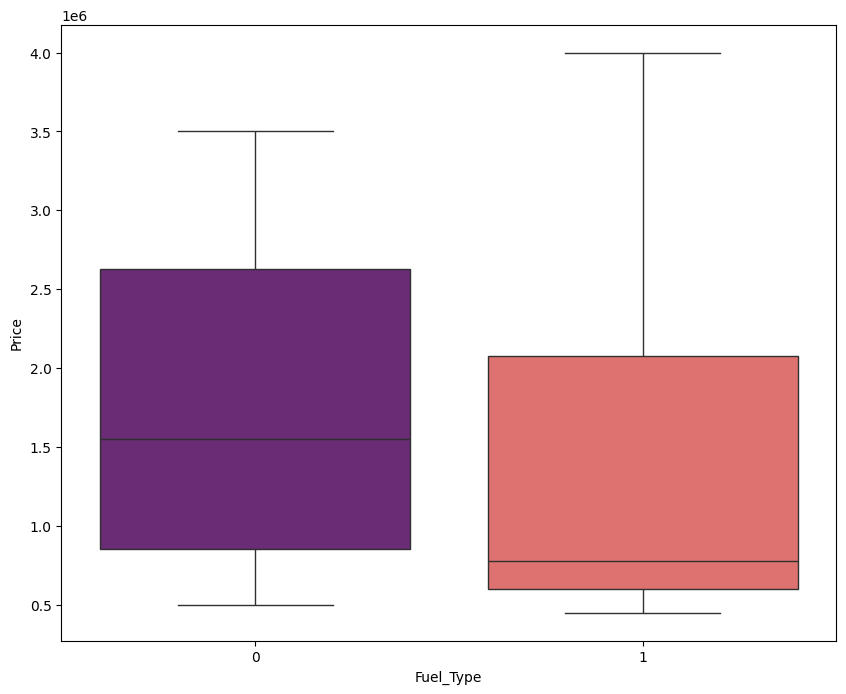

In [86]:
# Fuel type vs price
plt.figure(figsize=(10,8))
sns.boxplot(x='Fuel_Type',y='Price',data=df,palette="magma")
plt.xlabel('Fuel_Type')
plt.ylabel('Price')
plt.show()

<center>

### **04**
### **Phương pháp**

</center>

#### **Thuật toán kNN**


- Nhóm sử dụng thuật toán k-Nearest Neighbors (kNN) để tính toán sự tương quan giữa các người dùng .

- Cách hoạt động của kNN dựa trên nguyên tắc "nearest neighbors". Khi chúng ta có dữ liệu điểm và nhãn tương ứng của chúng, kNN sẽ lưu trữ dữ liệu này trong bộ nhớ và sử dụng nó để dự đoán nhãn của các điểm dữ liệu mới dựa trên các điểm dữ liệu "nearest neighbors" nhất với điểm dữ liệu đó.
    - Bước 1: Chọn giá trị k mà thuật toán sẽ sử dụng.
    - Bước 2: Tính khoảng cách giữa điểm dữ liệu mới và các điểm dữ liệu trong tập train. Khoảng cách thường được sử dụng là khoảng cách Euclid.
    - Bước 3: Chọn k điểm dữ liệu gần nhất dựa trên khoảng cách tính được.
    - Bước 4: Đếm số votes cho mỗi nhẫn từ k điểm dữ liệu gần nhất.
    - Bước 5: Dự đoán nhãn cho điểm dữ liệu mới dựa trên nhãn với số phiếu bầu cao nhất.

- Để xây dựng mô hình kNN, chúng ta cần xác định giá trị của tham số k. Tham số k là số lượng hàng xóm được sử dụng để tính toán sự tương quan giữa các điểm dữ liệu.

<center>
    <img  src="https://media.licdn.com/dms/image/C5112AQFY4bX3Y7jcHA/article-cover_image-shrink_600_2000/0/1565431496642?e=2147483647&v=beta&t=N2zhB7OhvdTrebqNkY2lxMaPHqPYpA4r3nj88msI-e0" alt="SVD" width="800" height="500">
</center>

- Để tìm ra giá trị k phù hợp, có thể thực hiện các bước sau:
    - Bước 1: Phân tích dữ liệu: Khám phá và hiểu rõ tập dữ liệu mà ta đang sử dụng, bao gồm số lượng các mẫu dữ liệu, số lượng các thuộc tính, đặc điểm của dữ liệu và mục tiêu của bài toán.
    - Bước 2: Lựa chọn giá trị ban đầu cho K: Thường thì các giá trị K được chọn là một số lẻ để tránh trường hợp xảy ra xung đột khi các mẫu dữ liệu có số láng giếng gần nhất bằng nhau. Một giá trị K đề xuất ban đầu có thể là 3 hoặc 5.
    - Bước 3: Đánh giá và tinh chỉnh giá trị K: Sử dụng một phương pháp đánh giá hiệu suất như cross-validation hoặc tỷ lệ tách dữ liệu để đánh giá hiệu suất của mô hình KNN với giá trị K đã chọn ban đầu. Dựa trên kết quả đánh giá hiệu suất, tính chỉnh giá trị K bằng cách thử nghiệm với các giá trị K khác nhau và chọn giá trị K tốt nhất.
    - Bước 4: Đánh giá và so sánh hiệu suất: Tiếp tục đánh giá hiệu suất mô hình KNN với giá trị K được chọn và so sánh với các giá trị K khác để đảm bảo rằng giá trị K tốt nhất để được chọn.

- Sau khi xác định được giá trị của tham số k, chúng ta có thể sử dụng mô hình kNN để dự đoán xếp hạng c mà người dùng chưa từng đọc.


#### **Thuật toán Hồi quy tuyến tính**

- Về bản chất, một kỹ thuật hồi quy tuyến tính đơn giản cố gắng vẽ một đồ thị đường giữa hai biến dữ liệu, x và y. Là biến độc lập, x được vẽ dọc theo trục hoành. Các biến độc lập còn được gọi là biến giải thích hoặc biến dự báo. Biến phụ thuộc, y, được vẽ trên trục tung. Bạn cũng có thể tham chiếu các giá trị y như các biến phản hồi hoặc các biến dự báo.

##### *Các bước trong hồi quy tuyến tính*
- Bước 1: Để có cái nhìn tổng quan, hãy xem xét dạng đơn giản nhất của phương trình đồ thị đường giữa y và x; y=c*x+m, trong đó c và m là hằng số cho tất cả các giá trị có thể có của x và y. Vì vậy, chẳng hạn giả sử rằng tập dữ liệu đầu vào cho (x,y) là (1,5), (2,8), và (3,11). Để xác định phương pháp hồi quy tuyến tính, bạn sẽ thực hiện các bước sau:
- Bước 2: Vẽ một đường thẳng và đo lường mối tương quan giữa 1 và 5.
- Bước 3: Tiếp tục thay đổi hướng của đường thẳng cho các giá trị mới (2,8) và (3,11) cho đến khi tất cả các giá trị đều phù hợp.
- Bước 4: Xác định phương trình hồi quy tuyến tính là y=3*x+2.
Ngoại suy hoặc dự đoán y là 14 khi x là

<center>
    <img  src="https://websitehcm.com/wp-content/uploads/2021/12/image-77.png" alt="SVD" width="800" height="500">
</center>


#### **Thuật toán RandomForestRegressor**

- Quá trình làm việc có thể được giải thích trong các bước và sơ đồ dưới đây:

Bước 1: Chọn điểm dữ liệu K ngẫu nhiên từ tập huấn luyện.

Bước 2: Xây dựng cây quyết định liên kết với các điểm dữ liệu đã chọn (Tập con).

Bước 3: Chọn số N cho cây quyết định mà bạn muốn xây dựng.

Bước 4: Lặp lại Bước 1 & 2.

Bước 5: Đối với các điểm dữ liệu mới, hãy tìm các dự đoán của từng cây quyết định và gán các điểm dữ liệu mới cho danh mục giành được đa số phiếu bầu.

- Ví dụ: Giả sử có một tập dữ liệu chứa nhiều hình ảnh trái cây. Vì vậy, tập dữ liệu này được cung cấp cho bộ phân loại rừng ngẫu nhiên. Tập dữ liệu được chia thành các tập con và được cấp cho mỗi cây quyết định. Trong giai đoạn huấn luyện, mỗi cây quyết định tạo ra một kết quả dự đoán và khi một điểm dữ liệu mới xảy ra, thì dựa trên phần lớn kết quả, bộ phân loại Rừng Ngẫu nhiên dự đoán quyết định cuối cùng. Hãy xem xét hình ảnh dưới đây:

<center>
    <img  src="https://i.pinimg.com/564x/6a/cd/2a/6acd2a6685ae82518de5ae541d92067a.jpg" alt="SVD" width="800" height="500">
</center>

<center>

### **05**
### **Thực nghiệm, kết quả, và thảo luận**

</center>

In [87]:
X=df.drop(['Price'],axis=1)
Y=df[['Price']]

In [88]:
scaler_X = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler_Y = StandardScaler(copy=True, with_mean=True, with_std=True)

X = scaler_X.fit_transform(X)
Y = scaler_Y.fit_transform(Y)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42, shuffle =True)

#### KNN 

In [90]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

# Đánh giá hiệu quả của mô hình
knn_mse = mean_squared_error(y_test, y_pred)
knn_r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {knn_mse:.2f}')
print(f'R^2 Score: {knn_r2:.2f}')

Mean Squared Error: 0.32
R^2 Score: 0.69


#### HỒI QUY TUYẾN TÍNH


In [91]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

Y_pred = lr.predict(X_test)

lr_r2 = r2_score(y_test, Y_pred)
print(lr_r2)

0.7491233616095967


#### RANDOM FOREST

In [92]:
rfr = RandomForestRegressor(n_estimators=150,random_state=33)
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=150, random_state=33)

In [93]:
y_pred = rfr.predict(X_test)

In [97]:

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Sai số tuyệt đối trung bình:", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Sai số bình phương trung bình (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Setting squared=False gives RMSE
print("Sai số bình phương trung bình căn bậc hai (RMSE):", rmse)

# R^2 score
rfr_r2 = r2_score(y_test, y_pred)
print("R^2 score:", rfr_r2)
print('RMSE =:' , np.sqrt(mean_squared_error(y_test, y_pred)))

Sai số tuyệt đối trung bình: 0.16915690850719212
Sai số bình phương trung bình (MSE): 0.09534816908186955
Sai số bình phương trung bình căn bậc hai (RMSE): 0.3087849884334884
R^2 score: 0.908829614428853
RMSE =: 0.3087849884334884


### Mô hình tối ưu nhất


In [95]:
if knn_r2 >= rfr_r2 and knn_r2 >= lr_r2:
    best_model = knn
    print(f"Mô hình tối ưu nhất là kNN: {best_model}")
elif rfr_r2 >= knn_r2 and rfr_r2 >= lr_r2:
    best_model = rfr
    print(f"Mô hình tối ưu nhất là Random Forest: {best_model}")
else:
    best_model = lr
    print(f"Mô hình tối ưu nhất là Linear Regresion: {best_model}")

Mô hình tối ưu nhất là Random Forest: RandomForestRegressor(n_estimators=150, random_state=33)


#### XÂY DỰNG MÔ HÌNH HỆ THỐNG DỰ ĐOÁN GIÁ XE

In [96]:
new_data = pd.DataFrame({
    "Brand": ["Ford"],
    "Model": ["Mustang"],
    "Year": [2018],
    "Kilometers_Driven": [40000],
    "Fuel_Type" : ["Petrol"],
    "Transmission": ["Automatic"],
    "Owner_Type": ["First"],
    "Mileage": [17],
    "Engine": [1498],
    "Power": [140],
    "Seats": [5]
})

new_data[categorical_columns] = new_data[categorical_columns].apply(lambda x: Lbl.fit_transform(x))
# lambda là hàm ẩn danh, xử lý ngay lúc đó không sử dụng lại.
new_data = scaler_X.transform(new_data)

# Predict the price
predicted_price_scaled = best_model.predict(new_data)
predicted_price = scaler_Y.inverse_transform(predicted_price_scaled.reshape(-1, 1))

print("Giá xe dự đoán là:", predicted_price[0][0])

Giá xe dự đoán là: 1082666.6666666663


<center>

### **06**
### **Kết luận**

</center>

- Về kiến thức:
    - Hiểu rõ về cả thuật toán K-nearest neighbors (KNN), Hồi quy tuyến tính và Random Forests, bao gồm cách mỗi thuật toán hoạt động, cách tính toán dự đoán và cách chúng xử lý dữ liệu.
- Về mục tiêu: 
    - Xử lý dữ liệu ngoại biên để chuẩn bị cho việc sử dụng cả hai thuật toán. Điều này bao gồm việc xử lý dữ liệu thiếu, chuẩn hóa dữ liệu và chọn lọc các đặc trưng quan trọng.
    - Xây dựng các mô hình dự đoán giá xe cũ dựa trên thông số kỹ thuật sử dụng cả hai thuật toán KNN và Random Forests. Đảm bảo rằng các mô hình này có khả năng dự đoán chính xác giá trị của các xe dựa trên thông số kỹ thuật được cung cấp.
    - Đánh giá hiệu suất của các mô hình bằng cách sử dụng các phương pháp đánh giá như cross-validation và tính toán các độ đo như Mean Absolute Error (MAE) và Root Mean Squared Error (RMSE).
- Về triển vọng:
    - Mô hình dự đoán giá xe cũ dựa trên cả thuật toán KNN, Hồi quy tuyến tính và Random Forests đã được xây dựng và đánh giá, đem lại kết quả dự đoán chính xác và đáng tin cậy.
    - Qua quá trình xử lý dữ liệu và xây dựng mô hình, đã đạt được mục tiêu xử lý dữ liệu ngoại biên và xây dựng các mô hình dự đoán hiệu quả.
    - Trong tương lai, tiềm năng phát triển tiếp theo có thể bao gồm việc tối ưu hóa các mô hình, cải thiện hiệu suất dự đoán bằng cách tinh chỉnh siêu tham số và mở rộng ứng dụng của mô hình sang các lĩnh vực khác trong lĩnh vực dự đoán giá trị.


<center>

### **07**
### **Đóng góp**

</center>

<center>

| STT | Công việc thực hiện| Họ và tên|
|:---:|:------------------:|:--------:|
|1|Thu thập dữ liệu|Đỗ Quốc Việt, Phạm Quốc Đức|
|2|Tiền xử lý dữ liệu|Thu Hằng|
|3|Xây dựng và đánh giá mô hình KNN|Trịnh Ngọc Hiếu, Phạm Quốc Đức|
|4|Xây dựng và đánh giá mô hình Random Forests |Trịnh Ngọc Hiếu, Đỗ Quốc Việt|
|5|Xây dựng mô hình gợi ý cho người dùng|Thu Hằng, Đỗ Quốc Việt|
|6|Viết báo cáo|Thu Hằng|

</center>

<center>

### **08**
### **Tham khảo**

</center>

- Linear Regression - Hồi quy tuyến tính trong Machine Learning: https://viblo.asia/p/linear-regression-hoi-quy-tuyen-tinh-trong-machine-learning-4P856akRlY3

- Giới thiệu về thuật toán Random Forest: https://machinelearningcoban.com/tabml_book/ch_model/random_forest.html

- Thuật Toán K-Nearest Neighbors (KNN): https://codelearn.io/sharing/thuat-toan-k-nearest-neighbors-knn

- Một số biểu đồ matplotlib: https://phamdinhkhanh.github.io/deepai-book/ch_appendix/appendix_matplotlib.html

- Data visualization với Seaborn: https://viblo.asia/p/data-visualization-voi-seaborn-oOVlYP9vZ8W